In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('COVID-19-time-series-clean-complete.csv')
df.tail()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
108654,108654,2021-08-06,Vietnam,193381,3016,0.0,190365.0,4315,296,0
108655,108655,2021-08-06,West Bank and Gaza,317703,3611,0.0,314092.0,169,2,0
108656,108656,2021-08-06,Yemen,7131,1384,0.0,5747.0,27,1,0
108657,108657,2021-08-06,Zambia,199135,3459,0.0,195676.0,680,12,0
108658,108658,2021-08-06,Zimbabwe,115445,3805,0.0,111640.0,956,51,0


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
108654,2021-08-06,Vietnam,193381,3016,0.0,190365.0,4315,296,0
108655,2021-08-06,West Bank and Gaza,317703,3611,0.0,314092.0,169,2,0
108656,2021-08-06,Yemen,7131,1384,0.0,5747.0,27,1,0
108657,2021-08-06,Zambia,199135,3459,0.0,195676.0,680,12,0
108658,2021-08-06,Zimbabwe,115445,3805,0.0,111640.0,956,51,0


### 8 countries with most covid cases in april 2020

In [4]:
df_april_2020 = df.loc[[i.year==2020 and i.month==4 for i in df['Date']]]
df_april_2020

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0
13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15
13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15
13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0
13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0
...,...,...,...,...,...,...,...,...,...
19295,2020-04-30,Vietnam,270,0,219.0,51.0,0,0,-3
19296,2020-04-30,West Bank and Gaza,344,2,76.0,266.0,0,0,5
19297,2020-04-30,Yemen,6,2,1.0,3.0,0,2,1
19298,2020-04-30,Zambia,106,3,55.0,48.0,9,0,1


In [5]:
most_cases_apr_2020 = df_april_2020.groupby('Country/Region')['New cases'].sum().sort_values(ascending=False).reset_index()
most_cases_apr_2020

,Country/Region,New cases
0,US,888804
1,France,140313
2,United Kingdom,139956
3,Spain,127546
4,Turkey,106673
...,...,...
188,Vanuatu,0
189,Summer Olympics 2020,0
190,Marshall Islands,0
191,Lesotho,0


In [6]:
most_cases_apr_2020.iloc[:8]

,Country/Region,New cases
0,US,888804
1,France,140313
2,United Kingdom,139956
3,Spain,127546
4,Turkey,106673
5,Russia,104161
6,Italy,99671
7,Germany,91201


### Iran cases and deaths in august 2020

In [7]:
aug_2020 = df.loc[[i.year==2020 and i.month==8 for i in df['Date']]]
iran_new_aug_2020 = aug_2020.loc[aug_2020['Country/Region']=='Iran']['New cases']
iran_new_death_aug_2020 = aug_2020.loc[aug_2020['Country/Region']=='Iran']['New deaths']
iran_new_aug_2020.index = range(1, 32)
iran_new_death_aug_2020.index = range(1, 32)

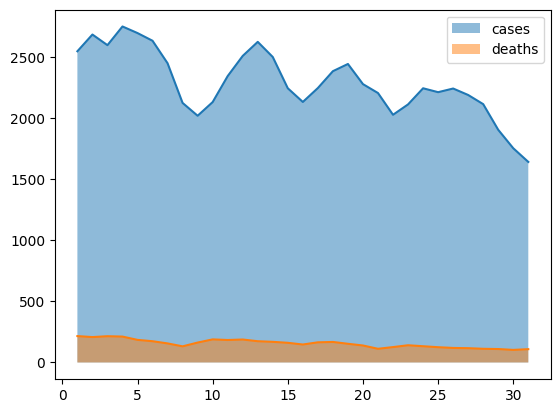

In [13]:
plt.plot(iran_new_aug_2020)
plt.plot(iran_new_death_aug_2020)

plt.fill_between(range(1,32), iran_new_aug_2020,0, alpha=.5, label='cases')
plt.fill_between(range(1,32), iran_new_death_aug_2020,0, alpha=.5, label='deaths')
plt.legend()